In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Data_for_UCI_named (1).csv')

In [3]:
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [4]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [5]:
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [6]:
#dropping corelating column
data_df=df.drop(columns=['stab'])

In [7]:
data_df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,unstable


In [8]:
#seperating data to dependent variable and feature

X = data_df.drop(columns='stabf')
y = data_df['stabf']


In [9]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [10]:
x_train.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4'],
      dtype='object')

In [11]:
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [12]:
#import MinMaxScaler t0 normalise the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#x_train
normalised_train_df = scaler.fit_transform(x_train)
normalised_train_df = pd.DataFrame(normalised_train_df, columns=x_train.columns)

#x_test
normalised_test_df = scaler.transform(x_test)
normalised_test_df = pd.DataFrame(normalised_test_df, columns=x_test.columns)



In [13]:
normalised_train_df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.605895,0.214898,0.686826,0.945002,0.454782,0.516700,0.874552,0.255448,0.545528,0.598331,0.669360,0.642234
1,0.481097,0.525305,0.797470,0.027436,0.616162,0.479547,0.065178,0.641255,0.414248,0.049680,0.912824,0.083403
2,0.075724,0.874245,0.355155,0.835240,0.474432,0.640493,0.697645,0.252484,0.903588,0.919622,0.198830,0.642306
3,0.736693,0.652439,0.873580,0.171161,0.362461,0.278625,0.940452,0.691134,0.221930,0.893734,0.963154,0.579607
4,0.692014,0.088023,0.589553,0.764197,0.220544,0.718310,0.911640,0.685474,0.983833,0.701163,0.828559,0.121206
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.947942,0.501630,0.160952,0.792326,0.436067,0.718167,0.315786,0.666197,0.149332,0.590851,0.031541,0.316121
7996,0.793271,0.434989,0.071276,0.074168,0.586343,0.287753,0.786719,0.196614,0.182514,0.281840,0.712410,0.412244
7997,0.689756,0.290888,0.095294,0.420814,0.504170,0.914034,0.394700,0.197039,0.861431,0.584817,0.053214,0.734067
7998,0.482641,0.135673,0.209040,0.247169,0.368319,0.738076,0.649711,0.505777,0.446253,0.387895,0.290830,0.981638


In [14]:
 y_train

2694    unstable
5140    unstable
2568    unstable
3671    unstable
7427    unstable
          ...   
2895      stable
7813      stable
905     unstable
5192    unstable
235       stable
Name: stabf, Length: 8000, dtype: object

**RandomForestClassifier Model Methode**

In [15]:
#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

ran_forest = RandomForestClassifier(random_state=1)
ran_forest.fit(normalised_train_df, y_train)

forest_predictions = ran_forest.predict(normalised_test_df)


In [16]:
#estimating model performance
from sklearn import metrics
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix



In [17]:
#confusion_matrix
cnf_mat = confusion_matrix(y_true=y_test, y_pred=forest_predictions, labels=['stable', 'unstable'])

In [18]:
cnf_mat

array([[ 625,   87],
       [  55, 1233]], dtype=int64)

In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred=forest_predictions))
print("Precision:",metrics.precision_score(y_test, y_pred=forest_predictions, pos_label='stable'))
print("Recall:",metrics.recall_score(y_test, y_pred=forest_predictions, pos_label='stable'))
print("f1_score:",metrics.f1_score(y_test, y_pred=forest_predictions, pos_label='stable'))

Accuracy: 0.929
Precision: 0.9191176470588235
Recall: 0.8778089887640449
f1_score: 0.8979885057471264


**ExtraTreesClassifierClassifier Model Methode**

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree = ExtraTreesClassifier(random_state=1)
extra_tree.fit(normalised_train_df, y_train)

tree_predictions = extra_tree.predict(normalised_test_df)

In [21]:
#confusion_matrix
cnf_mat = confusion_matrix(y_true=y_test, y_pred=tree_predictions, labels=['stable', 'unstable'])

In [22]:
cnf_mat

array([[ 606,  106],
       [  38, 1250]], dtype=int64)

In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred=tree_predictions))
print("Precision:",metrics.precision_score(y_test, y_pred=tree_predictions, pos_label='stable'))
print("Recall:",metrics.recall_score(y_test, y_pred=tree_predictions, pos_label='stable'))
print("f1_score:",metrics.f1_score(y_test, y_pred=tree_predictions, pos_label='stable'))

Accuracy: 0.928
Precision: 0.9409937888198758
Recall: 0.851123595505618
f1_score: 0.8938053097345133


**xgboost Classifier Model Methode**

In [53]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=1)
xgb.fit(normalised_train_df, y_train)

xgb_predictions = xgb.predict(normalised_test_df)

In [54]:
#confusion_matrix
cnf_mat = confusion_matrix(y_true=y_test, y_pred=xgb_predictions, labels=['stable', 'unstable'])

In [55]:
cnf_mat

array([[ 648,   64],
       [  45, 1243]], dtype=int64)

In [56]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred=xgb_predictions))
print("Precision:",metrics.precision_score(y_test, y_pred=xgb_predictions, pos_label='stable'))
print("Recall:",metrics.recall_score(y_test, y_pred=xgb_predictions, pos_label='stable'))
print("f1_score:",metrics.f1_score(y_test, y_pred=xgb_predictions, pos_label='stable'))

Accuracy: 0.9455
Precision: 0.935064935064935
Recall: 0.9101123595505618
f1_score: 0.9224199288256227


**lightgb Classifier Model Methode**

In [30]:
from lightgbm import LGBMClassifier

litgbm = LGBMClassifier(random_state=1)
litgbm.fit(normalised_train_df, y_train)

litgbm_predictions = litgbm.predict(normalised_test_df)

In [57]:
#confusion_matrix
cnf_mat = confusion_matrix(y_true=y_test, y_pred=litgbm_predictions, labels=['stable', 'unstable'])

In [58]:
cnf_mat     'Recall: {}'.format(round(recall*100, 2)

array([[ 642,   70],
       [  50, 1238]], dtype=int64)

In [62]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred=litgbm_predictions))
print("Precision:",metrics.precision_score(y_test, y_pred=litgbm_predictions, pos_label='stable'))
print("Recall:",metrics.recall_score(y_test, y_pred=litgbm_predictions, pos_label='stable'))
print("f1_score:",metrics.f1_score(y_test, y_pred=litgbm_predictions, pos_label='stable'))

Accuracy: 0.94
Precision: 0.9277456647398844
Recall: 0.901685393258427
f1_score: 0.9145299145299145


**RandomizedSearchCV Classifier Model Methode**

In [38]:
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

In [40]:
from sklearn.model_selection import RandomizedSearchCV

random_cv = RandomizedSearchCV(estimator=extra_tree,
            param_distributions=hyperparameter_grid,
            random_state=1)
random_cv.fit(normalised_train_df, y_train)

RandomizedSearchCV(estimator=ExtraTreesClassifier(random_state=1),
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=1)

In [60]:
random_cv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [41]:
random_cv_predictions = random_cv.predict(normalised_test_df)

In [42]:
#confusion_matrix
cnf_mat = confusion_matrix(y_true=y_test, y_pred=random_cv_predictions, labels=['stable', 'unstable'])

In [43]:
cnf_mat

array([[ 619,   93],
       [  53, 1235]], dtype=int64)

In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred=random_cv_predictions))
print("Precision:",metrics.precision_score(y_test, y_pred=random_cv_predictions, pos_label='stable'))
print("Recall:",metrics.recall_score(y_test, y_pred=random_cv_predictions, pos_label='stable'))
print("f1_score:",metrics.f1_score(y_test, y_pred=random_cv_predictions, pos_label='stable'))

Accuracy: 0.927
Precision: 0.9211309523809523
Recall: 0.8693820224719101
f1_score: 0.8945086705202311


p = TP/TP+FP

Feature: 0, Score: 0.13724
Feature: 1, Score: 0.14051
Feature: 2, Score: 0.13468
Feature: 3, Score: 0.13542
Feature: 4, Score: 0.00368
Feature: 5, Score: 0.00534
Feature: 6, Score: 0.00543
Feature: 7, Score: 0.00496
Feature: 8, Score: 0.10256
Feature: 9, Score: 0.10758
Feature: 10, Score: 0.11306
Feature: 11, Score: 0.10954


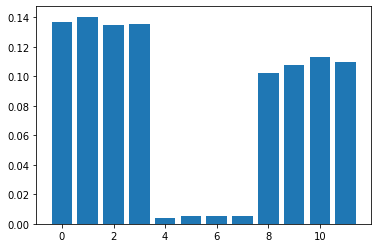

In [65]:
# feature importance
import matplotlib.pyplot as plt
importance = random_cv.best_estimator_.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plotbar feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [45]:
precision= 355/(1480+355)

In [46]:
precision

0.19346049046321526

R = TP/TP+FN

In [47]:
Recall= 355/(355+45)

In [48]:
Recall

0.8875

fi = 2*((p*r)/(p+r))

In [50]:
f1= (0.19346*0.8875)/(0.19346+0.8875)

In [51]:
f1

0.15883635842214328

In [52]:
f1*2

0.31767271684428655